In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
from general.utils import *

Define Perceptron Parameter grid search function.

In [2]:
def grid_search_params():
    parameters = {'max_iter': list(range(20, 201, 10)),
            'l1_ratio': [0.0, 0.05, 0.15, 0.25],
            'penalty': [None, 'l2','l1','elasticnet'],
            'alpha': [0.0001, 0.01, 0.]
    }
    clf = LogisticRegression(fit_intercept = True, C=0.01, max_iter=350, solver='saga')
    cv = StratifiedKFold(n_splits = 3, shuffle = True)
    gridsearch = GridSearchCV(clf, parameters, n_jobs = 12, cv = cv, scoring = 'roc_auc',
                                      verbose = 2, refit = True)

    _, _, train_set, train_label = get_samples("./data/train1_icu_data.csv", "./data/train1_icu_label.csv", ret_raw = True)
    gridsearch.fit(train_set, train_label.ravel())

    print(gridsearch.best_estimator_)

Load training and testing dataset from dataset 1.

In [3]:
clf = clf = LogisticRegression(fit_intercept = True, C=0.01, max_iter=350, solver='saga')

_, _, train_set, train_label = get_samples("./data/train1_icu_data.csv", "./data/train1_icu_label.csv", ret_raw = True)
_, _, raw_test, test_labels = get_samples("./data/test1_icu_data.csv", "./data/test1_icu_label.csv", ret_raw = True)

white_train_set = data_whitening(train_set)
white_test_set = data_whitening(raw_test)

In [4]:
clf.fit(white_train_set, train_label.ravel())

train_pred = clf.predict(white_train_set)
test_pred = clf.predict(white_test_set)

After direct fitting and testing, we perform cross validation.

In [5]:
cv_score = cross_val_score(clf, white_train_set, train_label.ravel(), cv = 5)

In [6]:
train_set_acc = acc_calculate(train_pred, train_label)
test_set_acc = acc_calculate(test_pred, test_labels)

print("From dataset 1:")
print("Train set accuracy: %f, train set error rate: %f"%(train_set_acc, 1 - train_set_acc))
print("Test set accuracy: %f, test set error rate: %f"%(test_set_acc, 1 - test_set_acc))
print("Cross validation score: ", cv_score)
print(clf.coef_)

From dataset 1:
Train set accuracy: 0.796200, train set error rate: 0.203800
Test set accuracy: 0.783045, test set error rate: 0.216955
Cross validation score:  [0.782 0.781 0.811 0.783 0.771]
[[ 3.29466121e-01  3.37259485e-03 -1.59421769e-01 -3.03055546e-02
   1.46090000e-01 -5.17776896e-02  4.39231707e-02 -9.57589746e-02
   4.97488221e-02  2.37174313e-01  6.76601592e-02 -1.33511561e-01
  -2.13923116e-01 -1.35878572e-01 -2.90357777e-02  6.88240593e-02
   6.34363522e-02  6.35153580e-02  5.43020869e-02  6.56764668e-02
  -1.36186010e-01 -5.13368121e-02  3.26891791e-01  2.00200101e-01
   2.66102365e-02 -3.32244932e-02  2.09174185e-01  9.27849466e-02
  -6.41122298e-02 -1.24154674e-01  6.15940320e-02  1.07279477e-02
  -8.55320879e-02 -2.67693049e-01 -3.07230943e-02 -1.32460911e-01
   1.10357805e-01 -2.39429016e-01  5.52667751e-02 -1.73026911e-02
  -1.33191643e-01  3.02575382e-02 -1.31585882e-02 -1.28186126e-01
   7.84161474e-02  1.30431874e-01 -5.56566200e-02  4.03458247e-02
  -1.36564455e-

> Train set accuracy: 0.730600, train set error rate: 0.269400 
> Test set accuracy: 0.714676, test set error rate: 0.285324

In [7]:
_, _, train_set, train_label = get_samples("./data/train2_icu_data.csv", "./data/train2_icu_label.csv", ret_raw = True)
_, _, raw_test, test_labels = get_samples("./data/test2_icu_data.csv", "./data/test2_icu_label.csv", ret_raw = True)

white_train_set = data_whitening(train_set)
white_test_set = data_whitening(raw_test)

In [8]:
clf.fit(white_train_set, train_label.ravel())

train_pred = clf.predict(white_train_set)
test_pred = clf.predict(white_test_set)

# If we don't predict proba and use predicted labels (binary) for ROC plotting, then we will have only three points for the plot
test_pred_proba = clf.predict_proba(white_test_set)
cv_score = cross_val_score(clf, white_train_set, train_label.ravel(), cv = 5)

train_set_acc = acc_calculate(train_pred, train_label)
test_set_acc = acc_calculate(test_pred, test_labels)

print("From dataset 2:")
print("Train set accuracy: %f, train set error rate: %f"%(train_set_acc, 1 - train_set_acc))
print("Test set accuracy: %f, test set error rate: %f"%(test_set_acc, 1 - test_set_acc))
print("Cross validation score: ", cv_score)
print(clf.coef_)

From dataset 2:
Train set accuracy: 0.983051, train set error rate: 0.016949
Test set accuracy: 0.795556, test set error rate: 0.204444
Cross validation score:  [0.97966102 0.94576271 0.97627119 0.96949153 0.97966102]
[[ 0.26678785 -0.06792856 -0.06969005  0.00181654  0.26504395 -0.07078563
  -0.06010102 -0.14759607  0.07854742  0.30488954  0.10286533 -0.35593146
  -0.21690229 -0.4071427   0.07252359  0.15741927  0.03672555  0.2493768
   0.04520949  0.12633401 -0.01447616 -0.10537629  0.7845947   0.1277095
  -0.04903757 -0.14891773  0.2270866   0.02586762  0.00462221 -0.16703392
   0.11151332  0.02924977 -0.00204965 -0.14090352 -0.0548188  -0.18493288
   0.09839918 -0.18080591 -0.00592328  0.01338791 -0.00959359  0.06381749
  -0.00410328 -0.04326107  0.08026669  0.15276504 -0.11640129  0.00683822
  -0.05388616  0.00755684 -0.16133335 -0.11063307 -0.00509247 -0.11663367
  -0.00797813 -0.14486432 -0.04849507 -0.08679666  0.00793238  0.06792289
  -0.00575892 -0.01423122  0.2654771  -0.018

Here I start to plot the ROC-AUC curve of Logistic regression classifier

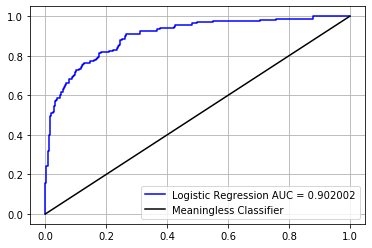

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

FP_r, TP_r, thes = roc_curve(test_labels, test_pred_proba[:, 1], drop_intermediate = False)
auc_value = auc(FP_r, TP_r)

plt.plot(FP_r, TP_r, label = 'Logistic Regression AUC = %f'%(auc_value), c = 'b')
plt.plot([0., 1.], [0., 1.], label = 'Meaningless Classifier', c = 'k')
plt.legend()
plt.grid(axis = 'both')
plt.show()